## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from xgboost import XGBClassifier

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


C:\Users\farma\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Importing and exploring dataset

In [2]:
df = pd.read_csv('BankChurners.csv')

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [5]:
df.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [6]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [7]:
df = df.drop(columns = [
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
    ],
)

In [8]:
df.head()
num_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

cat_cols = [x for x in df.columns if x not in ['CLIENTNUM']+num_cols]

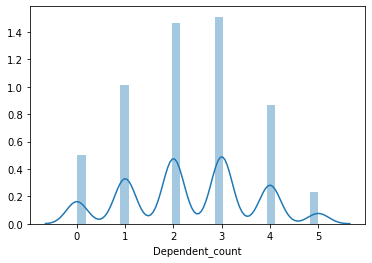

In [51]:
sns.distplot(df['Dependent_count']) 

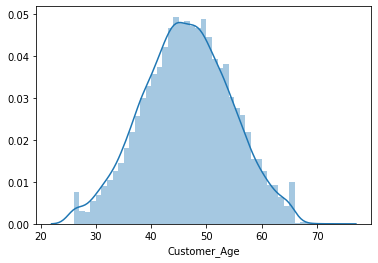

In [48]:
sns.distplot(df['Customer_Age']) 

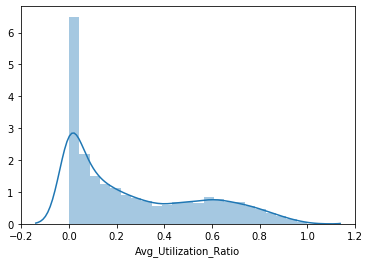

In [49]:
sns.distplot(df['Avg_Utilization_Ratio']) 

## Encode Categorical variables

In [ ]:
df = pd.get_dummies(df,columns=cat_cols)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CLIENTNUM                         10127 non-null  int64  
 1   Customer_Age                      10127 non-null  int64  
 2   Dependent_count                   10127 non-null  int64  
 3   Months_on_book                    10127 non-null  int64  
 4   Total_Relationship_Count          10127 non-null  int64  
 5   Months_Inactive_12_mon            10127 non-null  int64  
 6   Contacts_Count_12_mon             10127 non-null  int64  
 7   Credit_Limit                      10127 non-null  float64
 8   Total_Revolving_Bal               10127 non-null  int64  
 9   Avg_Open_To_Buy                   10127 non-null  float64
 10  Total_Amt_Chng_Q4_Q1              10127 non-null  float64
 11  Total_Trans_Amt                   10127 non-null  int64  
 12  Tota

In [11]:
feature_cols = [x for x in df.columns if x not in ['Attrition_Flag_Existing Customer', 'CLIENTNUM', 'Attrition_Flag_Attrited Customer']]

## Train test split

In [57]:
X=df[feature_cols]
Y=df[['Attrition_Flag_Existing Customer']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42)

## Logistic Regression

In [58]:

model=LogisticRegression(C=500,max_iter=50000)
model.fit(X_train, np.ravel(Y_train))


print('Logistic Regression:')
print('Traning Model accruracy: {:.2%}'.format(model.score(X_train,Y_train)))
print('Test Model accruracy: {:.2%}'.format(model.score(X_test,Y_test['Attrition_Flag_Existing Customer'])))

C:\Users\farma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression:
Traning Model accruracy: 90.52%
Test Model accruracy: 89.85%


## Dimentionality reduction based on correlation

In [14]:
# examine correlations to see if we can remove some of the columns to improve accuracy.
correlations = (
    df[feature_cols]
    .corr()
    .reset_index()
    .melt(
        id_vars = ['index'],
        var_name='col2',
        value_name='pearsons_corr', 
    )
    .rename(columns={'index': 'col1'})
    .query('col1 < col2')
    .assign(abs_corr = lambda x: abs(x['pearsons_corr']))
    .sort_values('abs_corr', ascending=False)
)

correlations.head(10)

,col1,col2,pearsons_corr,abs_corr
569,Gender_F,Gender_M,-1.000000,1.000000
230,Avg_Open_To_Buy,Credit_Limit,0.995981,0.995981
1365,Card_Category_Blue,Card_Category_Silver,-0.889816,0.889816
417,Total_Trans_Amt,Total_Trans_Ct,0.807192,0.807192
74,Customer_Age,Months_on_book,0.788912,0.788912
949,Marital_Status_Married,Marital_Status_Single,-0.741185,0.741185
272,Avg_Utilization_Ratio,Total_Revolving_Bal,0.624022,0.624022
1162,Gender_M,Income_Category_Less than $40K,-0.580016,0.580016
1161,Gender_F,Income_Category_Less than $40K,0.580016,0.580016
489,Avg_Open_To_Buy,Avg_Utilization_Ratio,-0.538808,0.538808


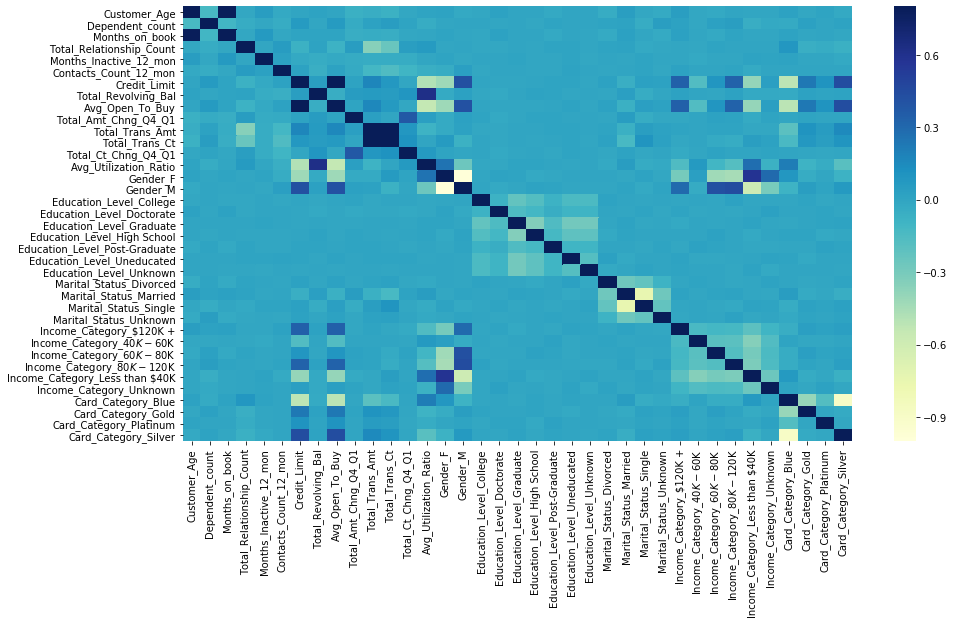

In [34]:
f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(df[feature_cols].corr(),vmax=.8, cmap="YlGnBu")

In [15]:
#Dropping highly correlated (>0.65) features
columns_to_drop = [
    'Gender_F', 'Avg_Open_To_Buy', 'Card_Category_Blue',
    'Customer_Age', 'Marital_Status_Married', 'Total_Trans_Ct'
]

In [16]:
X=df[set(feature_cols) - set(columns_to_drop)]
Y=df[['Attrition_Flag_Existing Customer']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)

model=LogisticRegression(C=500, max_iter=2000)
model.fit(X_train, np.ravel(Y_train))


print('Logistic Regression:')
print('Traning Model accruracy: {:.2%}'.format(model.score(X_train,Y_train)))
print('Test Model accruracy: {:.2%}'.format(model.score(X_test,Y_test['Attrition_Flag_Existing Customer'])))

C:\Users\farma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression:
Traning Model accruracy: 88.28%
Test Model accruracy: 87.84%


## Random Forest

In [17]:
X=df[set(feature_cols) - set(columns_to_drop)]
Y=df[['Attrition_Flag_Existing Customer']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)

model=RandomForestClassifier(max_depth = 30, random_state=0)
model.fit(X_train, np.ravel(Y_train))


print('Random Forest:')
print('Traning Model accruracy: {:.2%}'.format(model.score(X_train,Y_train)))
print('Test Model accruracy: {:.2%}'.format(model.score(X_test,Y_test['Attrition_Flag_Existing Customer'])))

C:\Users\farma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Random Forest:
Traning Model accruracy: 99.79%
Test Model accruracy: 93.05%


**Random Forest: Hyper-parameter tuning**

C:\Users\farma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\farma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\farma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\farma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\farma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\farma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value o

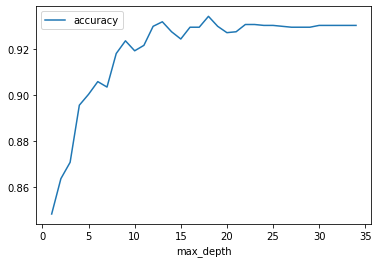

In [18]:
X=df[set(feature_cols) - set(columns_to_drop)]
Y=df[['Attrition_Flag_Existing Customer']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)

random_forest_results = []

for i in range(1, 35):
    model=RandomForestClassifier(max_depth=i, random_state=0)
    model.fit(X_train, np.ravel(Y_train))
    score = model.score(X_test,Y_test['Attrition_Flag_Existing Customer'])
    random_forest_results.append({
        'max_depth': i,
        'accuracy': score
    })
    
pd.DataFrame(random_forest_results).set_index('max_depth').plot()
    

## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

X=df[set(feature_cols) - set(columns_to_drop)]
Y=df[['Attrition_Flag_Existing Customer']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)

model=DecisionTreeClassifier(max_depth=10, random_state=0)
model.fit(X_train, np.ravel(Y_train))


print('Decision Tree')
print('Traning Model accruracy: {:.2%}'.format(model.score(X_train,Y_train)))
print('Test Model accruracy: {:.2%}'.format(model.score(X_test,Y_test['Attrition_Flag_Existing Customer'])))

Decision Tree
Traning Model accruracy: 97.24%
Test Model accruracy: 92.42%


**Decision Tree: Hyper-parameter tuning**

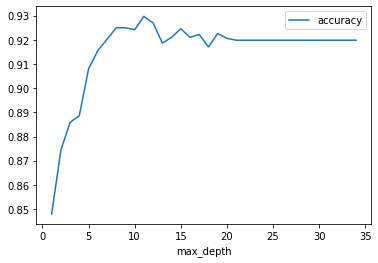

In [22]:
X=df[set(feature_cols) - set(columns_to_drop)]
Y=df[['Attrition_Flag_Existing Customer']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)

decision_tree_results = []

for i in range(1, 35):
    model=DecisionTreeClassifier(max_depth=i, random_state=0)
    model.fit(X_train, np.ravel(Y_train))
    score = model.score(X_test,Y_test['Attrition_Flag_Existing Customer'])
    decision_tree_results.append({
        'max_depth': i,
        'accuracy': score
    })
    
pd.DataFrame(decision_tree_results).set_index('max_depth').plot()
    

## XGBoost

In [35]:
classifier = XGBClassifier(random_state=0)
xgb_model = classifier.fit(X_train,Y_train)

print('Xgboost:')
print('Traning Model accruracy: {:.2%}'.format(xgb_model.score(X_train,Y_train)))
print('Test Model accruracy: {:.2%}'.format(xgb_model.score(X_test,Y_test['Attrition_Flag_Existing Customer'])))

Xgboost:
Traning Model accruracy: 96.18%
Test Model accruracy: 93.88%
